In [213]:
import pandas as pd
import numpy as np
import libs.DataCleaning as dc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv('/Users/blancurri/Desktop/Formació/IronHack/Projects/project-ml-show-noshow/data/show_no_show_ready_to_model.csv')

In [215]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Gender_M,AppointmentDay_DOW,AppointmentDay_Day_number,AppointmentDay_month,Difference_Days_App_Date_and_Sched_Day
0,62,0,1,0,0,0,0,0,0,0,29,0,0
1,56,0,0,0,0,0,0,0,1,0,29,0,0
2,62,0,0,0,0,0,0,0,0,0,29,0,0
3,8,0,0,0,0,0,0,0,0,0,29,0,0
4,56,0,1,1,0,0,0,0,0,0,29,0,0


In [216]:
df.shape

(106490, 13)

In [217]:
df.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'No-show', 'Gender_M', 'AppointmentDay_DOW',
       'AppointmentDay_Day_number', 'AppointmentDay_month',
       'Difference_Days_App_Date_and_Sched_Day'],
      dtype='object')

In [218]:
X = df.drop('No-show', axis = 1,inplace = False).values

In [219]:
y = df['No-show']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=69)

In [221]:
model = LogisticRegression(max_iter=1000)

In [222]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [223]:
model.score(X_train,y_train)

0.7941498009755004

In [103]:
#A partir de aquí empieza mi parte

In [104]:
print(model.intercept_)

[-1.70309106]


In [105]:
print(model.coef_)

[[-0.00882702  0.19353995  0.0040178   0.10589308  0.08324152  0.02321881
   0.43735738 -0.02039318 -0.02831396 -0.00225464  0.19390891  0.02208392]]


In [106]:
y_pred = model.predict(X_test)

In [107]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
len(y_pred)

35142

In [109]:
y_test

53536     1
99098     0
14704     0
45946     1
98658     0
         ..
66290     0
36616     1
23658     0
8311      0
102476    0
Name: No-show, Length: 35142, dtype: int64

In [110]:
len(y_test)

35142

/Users/blancurri/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

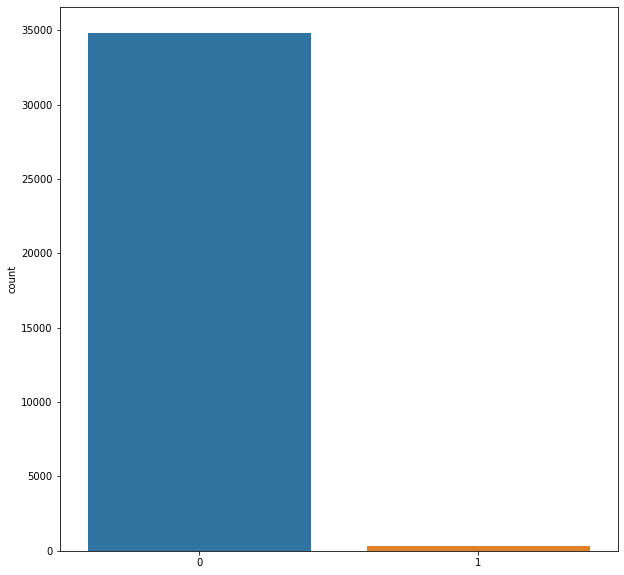

In [111]:
sns.countplot(y_pred)

/Users/blancurri/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No-show', ylabel='count'>

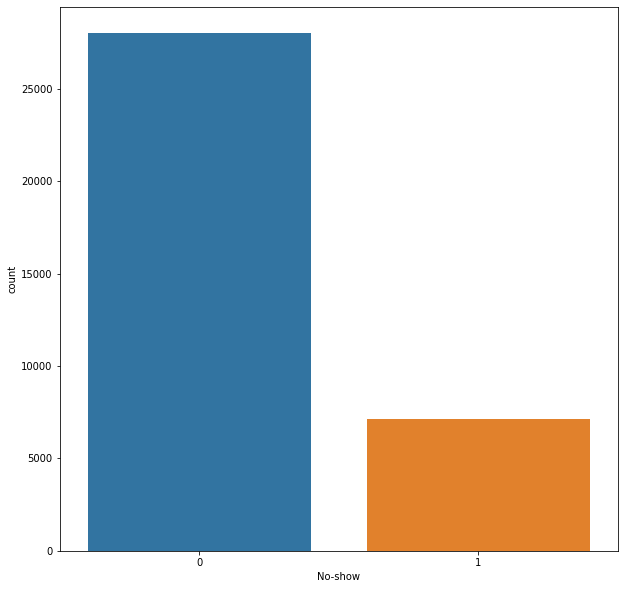

In [112]:
sns.countplot(y_test)

In [113]:
#Lazy classifier

sum(y_test == 0) / len(y_test)

0.7976495361675489

In [114]:
# Evaluate the model:

In [115]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [116]:
?confusion_matrix

<AxesSubplot:>

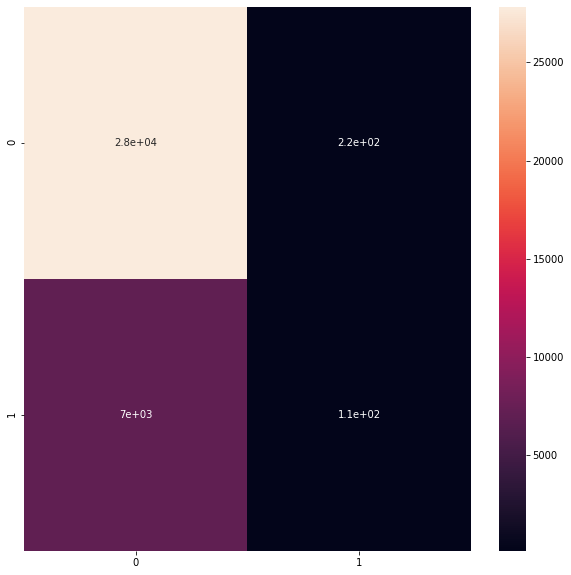

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     28031
           1       0.33      0.02      0.03      7111

    accuracy                           0.79     35142
   macro avg       0.57      0.50      0.46     35142
weighted avg       0.70      0.79      0.71     35142



In [119]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[27816   215]
 [ 7004   107]]
0.7945762904786295


In [120]:
#Vamos a ver cómo han salido los diferentes componentes de la evaluación para ver qué mejoramos:

In [121]:
accuracy_score(y_test, y_pred)

0.7945762904786295

In [122]:
precision_score(y_test, y_pred)

0.33229813664596275

In [123]:
recall_score(y_test, y_pred)

0.015047110111095486

In [124]:
f1_score(y_test, y_pred)

0.02879052872326113

In [125]:
# ROC/AUC

In [126]:
y_pred_probs = model.predict_proba(X_test)

In [127]:
y_pred_probs = y_pred_probs[:, 1]

In [128]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_probs)

In [129]:
auc(fpr, tpr)

0.6568317764548212

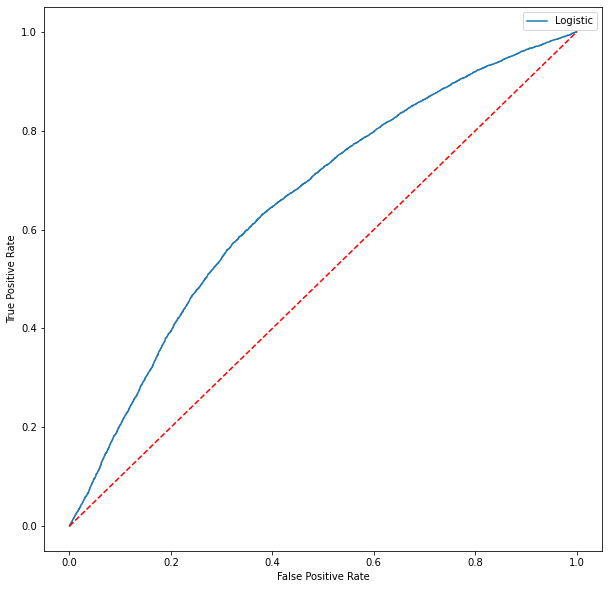

In [130]:
plt.plot(fpr, tpr, label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

plt.plot([0,1], [0,1], c='red', linestyle='--')

In [131]:
# Let's try new scores removing collinearity

In [132]:
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:>

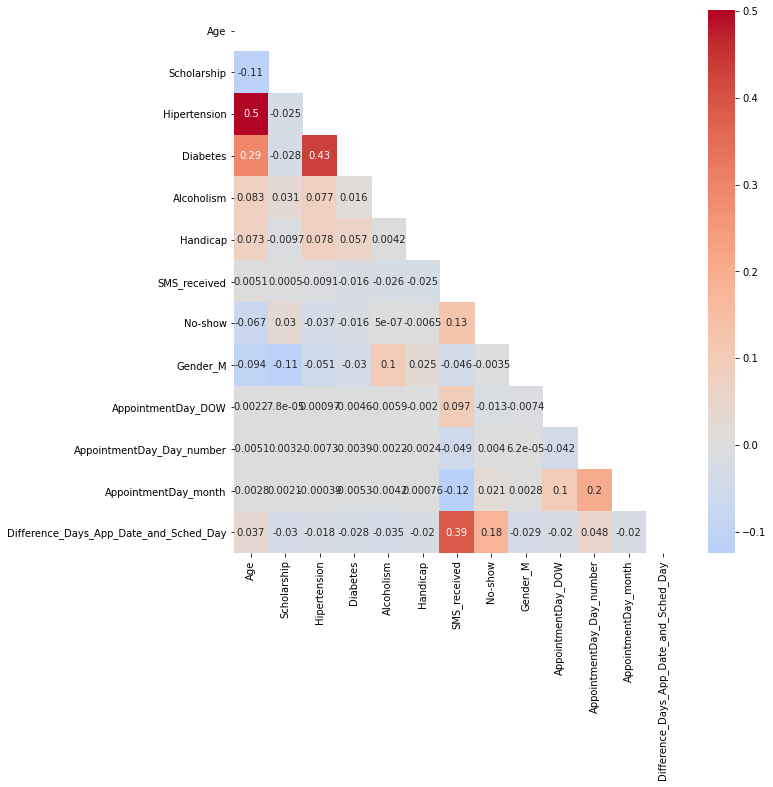

In [133]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',center = 0, mask=np.triu(df.corr()))

In [134]:
# There is no high colinearity, no heatmap results close to 1 or -1

In [135]:
# Let's try to improve results using scalers

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [136]:
rs = RobustScaler()

In [137]:
X_train_rs = rs.fit_transform(X_train)

In [138]:
X_test_rs = rs.fit_transform(X_test)

In [139]:
model.fit(X_train_rs, y_train)

LogisticRegression(max_iter=1000)

In [140]:
model.score(X_train_rs, y_train)

0.7941357851656669

In [141]:
y_pred_rs = model.predict(X_test_rs)

In [142]:
y_pred_rs

array([0, 0, 0, ..., 0, 0, 0])

/Users/blancurri/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

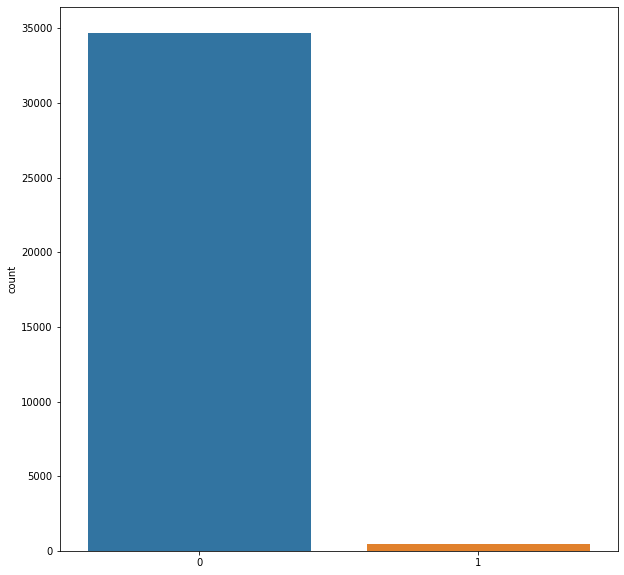

In [143]:
sns.countplot(y_pred_rs)

In [144]:
confusion_matrix(y_test,y_pred_rs)

array([[27722,   309],
       [ 6969,   142]])

In [145]:
#La accuracy sale aún más baja...

accuracy_score(y_test, y_pred_rs)

0.7928973877411645

In [ ]:
#Empezamos con el undersampling

In [190]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_blobs
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, InstanceHardnessThreshold
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss 
from imblearn.under_sampling import TomekLinks
from collections import Counter

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [224]:
#Instanciamos

under_sampler = RandomUnderSampler()

In [225]:
#Haces el fit para obtener una nueva X e Y donde tendrás menos o más instancias según si haces under o no

X_res, y_res = under_sampler.fit_resample(X, y)

In [226]:
#X, y = make_blobs([800, 200], cluster_std = 2)

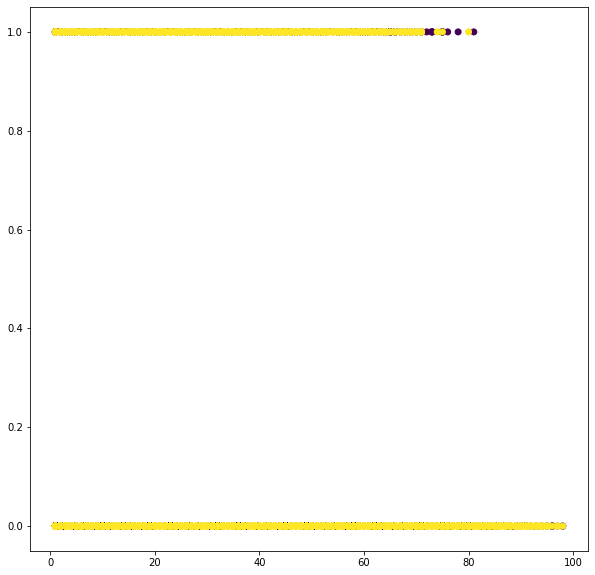

In [227]:
plt.scatter(X_res[:,0],X_res[:,1], c = y_res)

In [228]:
LogisticRegression().fit(X_res, y_res).score(X_res, y_res)

/Users/blancurri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6280207801846097

In [229]:
#Probamos con Near Miss

In [230]:
nm = NearMiss()

In [231]:
X_miss, y_miss = nm.fit_resample(X, y)

In [232]:
#X, y = make_blobs([800, 200], cluster_std = 2)

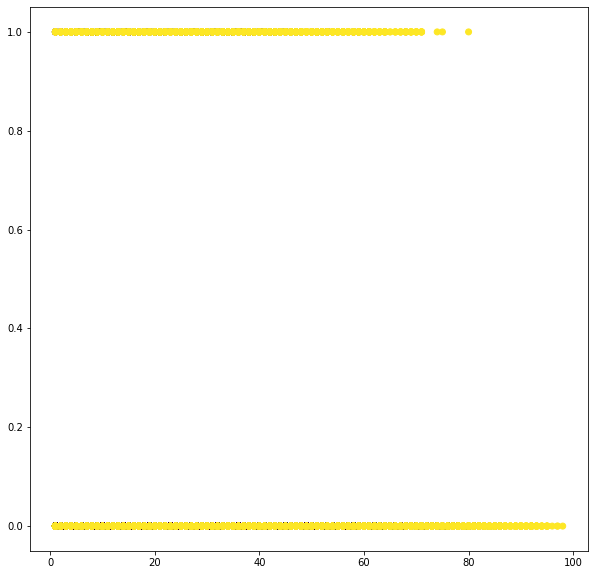

In [233]:
plt.scatter(X_miss[:,0],X_miss[:,1], c = y_miss)

In [234]:
LogisticRegression().fit(X_miss, y_miss).score(X_miss, y_miss)

/Users/blancurri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7861449974488612

In [235]:
#Probamos con TomekLinks
#https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

In [236]:
undersample = TomekLinks()

In [237]:
X_tomek, y_tomek = undersample.fit_resample(X, y)

In [238]:
#X, y = make_blobs([800, 200], cluster_std = 2)

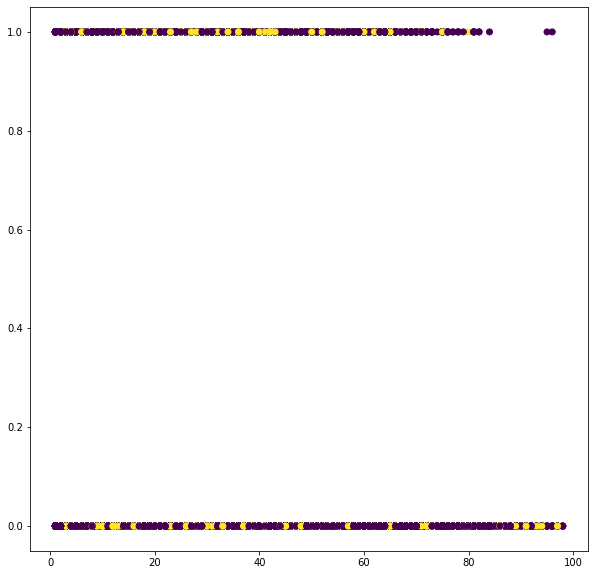

In [239]:
plt.scatter(X_tomek[:,0],X_tomek[:,1], c = y_tomek)

In [240]:
LogisticRegression().fit(X_tomek, y_tomek).score(X_tomek, y_tomek)

/Users/blancurri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7881436791025357